<a href="https://colab.research.google.com/github/ashok2216-A/Data_Analytics/blob/main/twitter_trump_insult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Trump Insults and Comments

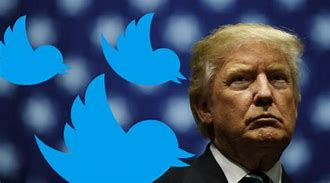

**Twitter data is the information collected by either the user, the access point, what’s in the post and how users view or use your post. While this might sound somewhat vague, it’s largely due to the massive amount of data that can be collected from a single Tweet.**

**With this information, you can know demographics, total clicks on your profile or how many people saw your Tweet. This is just the tip of the iceberg, but understanding the data allows you to know how it’s used and the patterns of your content.**

**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**Import Data**

In [9]:
from google.colab import files
uploaded = files.upload()

Saving kaggle (2).json to kaggle (2).json


In [10]:
import os
os.environ['KAGGLE_USERNAME'] = "ashokkumarbibbab"
os.environ['KAGGLE_KEY'] = "5c96f421fb8615214ae44ea508e149f6"

In [11]:
!kaggle datasets download -d ayushggarg/all-trumps-twitter-insults-20152021

  0% 0.00/581k [00:00<?, ?B/s]
100% 581k/581k [00:00<00:00, 37.6MB/s]


In [13]:
from zipfile import ZipFile

file_path = '/content/all-trumps-twitter-insults-20152021.zip'

with ZipFile(file_path, 'r') as zip:
  print('Extracting...')
  zip.extractall()
  print('Done')

Extracting...
Done


In [14]:
tt = pd.read_csv('/content/trump_insult_tweets_2014_to_2021.csv')
tt

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."
...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they..."
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late..."
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...


**Check Shape**

In [15]:
tt.shape

(10360, 5)

**Check Dataset Have Null Values or Not**

In [16]:
tt.isnull().sum()

Unnamed: 0    0
date          0
target        2
insult        0
tweet         0
dtype: int64

**This Plot Indicates No null but it have 2 null values in Target Column**

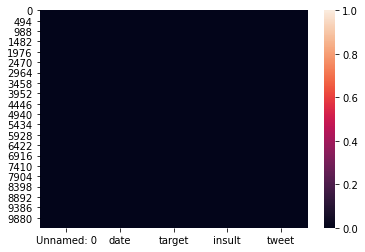

In [17]:
sns.heatmap(tt.isnull())

**Delete the 2 rows and the data shape is 10358**

In [18]:
tt = (tt.drop(tt.columns[0], axis=1)).dropna()
print(len(tt))
tt.head()

10358


,date,target,insult,tweet
0,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


**Check There is null value or not**

In [19]:
tt.isnull().sum()

date      0
target    0
insult    0
tweet     0
dtype: int64

**Create wordcloud to identify repeated words in tweet text**

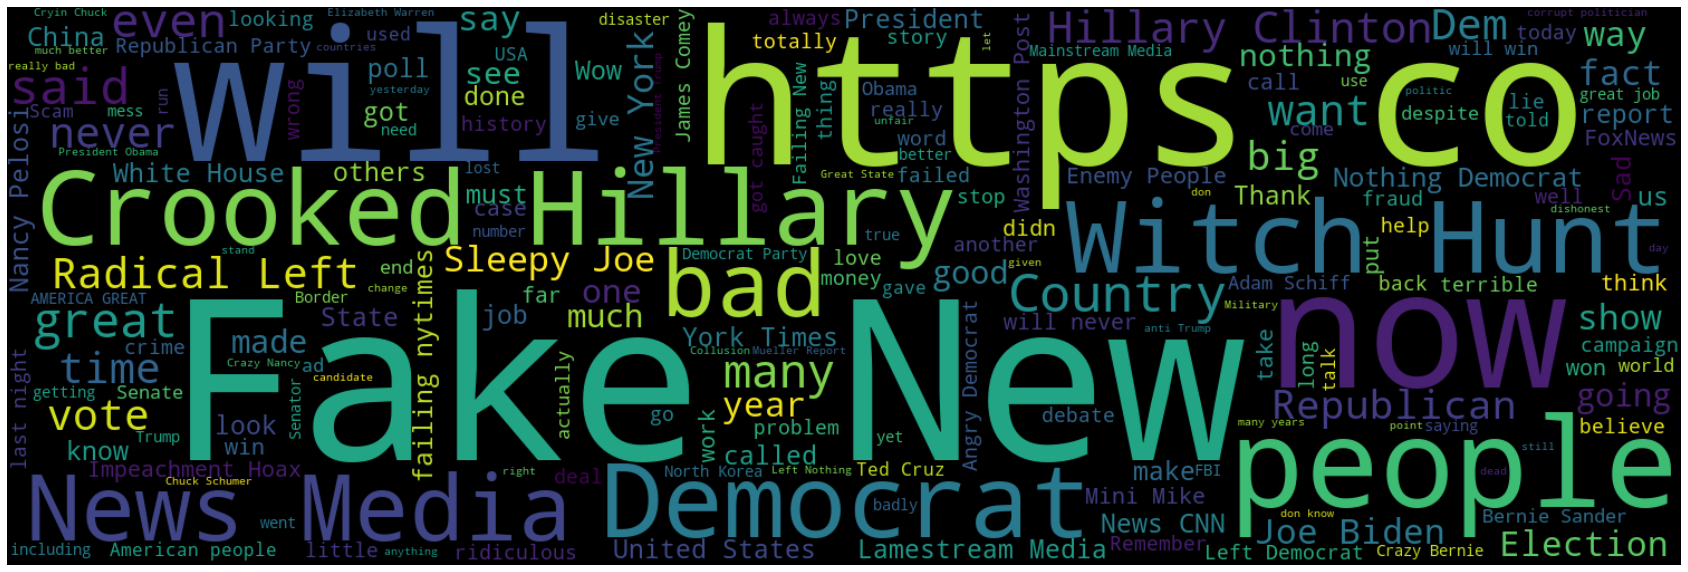

In [20]:
tweet_text = " ".join(tt.tweet)

wordcloud = WordCloud(width=1500, height=500).generate(tweet_text)

plt.figure( figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Create wordcloud to identify repeated words in target text**

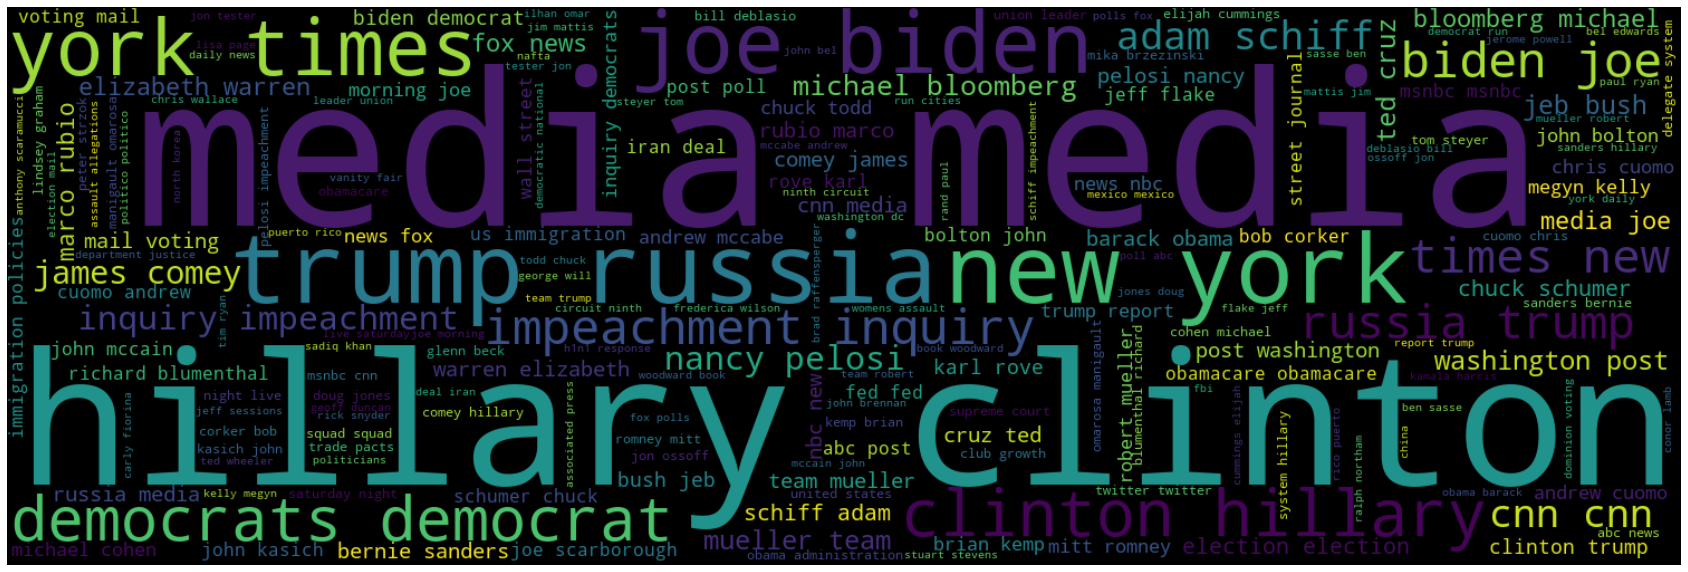

In [21]:
target_text = " ".join(tt.target)

wordcloud = WordCloud(width=1500, height=500).generate(target_text)

plt.figure( figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Create wordcloud to identify repeated words in insult text**

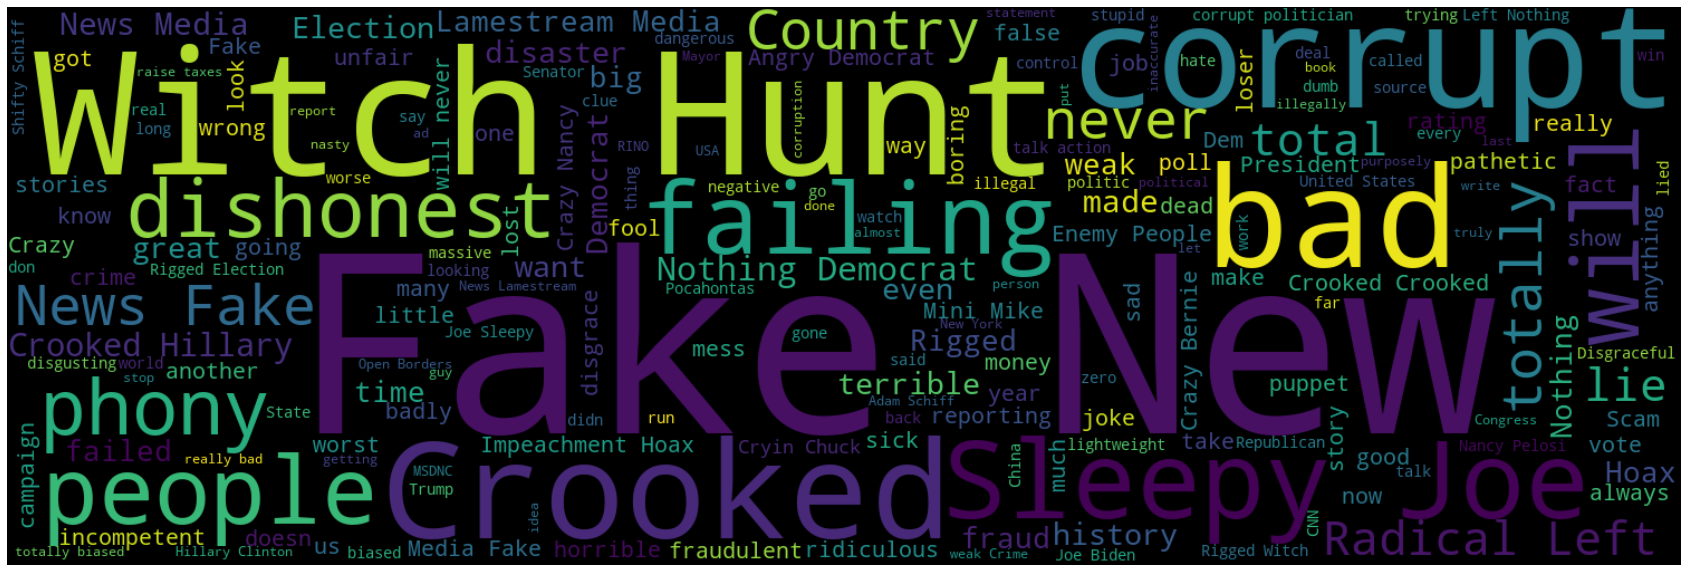

In [22]:
insult_text = " ".join(tt.insult)

wordcloud = WordCloud(width=1500, height=500).generate(insult_text)

plt.figure( figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**One important improvement you may think of is, to get rid of some less important words such as is, are, too, some, etc. That is very easy. Because there is a set of those words called ‘stopwords’ that are already there for us to use.**

In [23]:
stopwords = set(STOPWORDS)

In [24]:
stopwords.update("Fake", "bad", "Country", "media", "joe biden")

**Import Image**

In [26]:
mask = np.array(Image.open("/content/Graphic1.jpg"))

**Use Custom Shape**

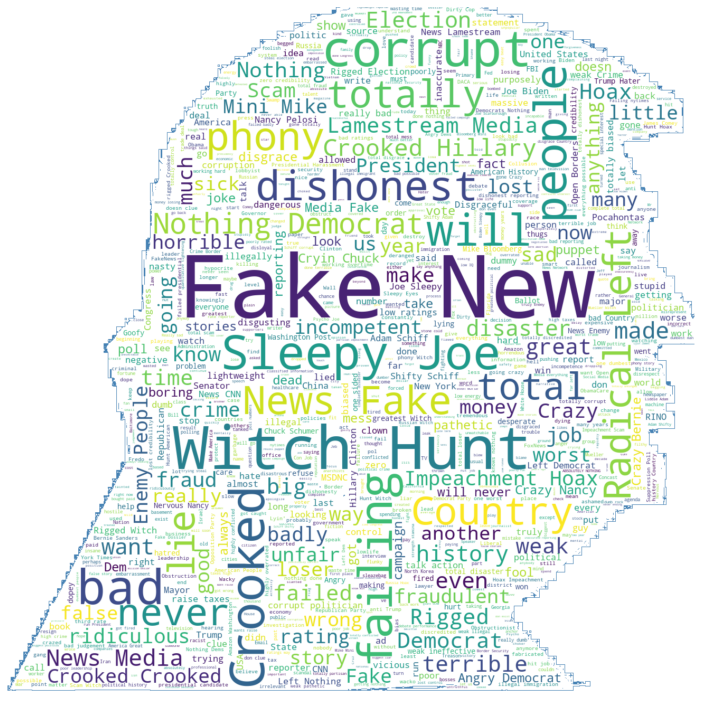

In [27]:
wc = WordCloud(background_color='white', mask=mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='steelblue')
wc.generate(insult_text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

**Use custom shape for wordcloud**

In [28]:
mask = np.array(Image.open("/content/Graphic2.jpg"))

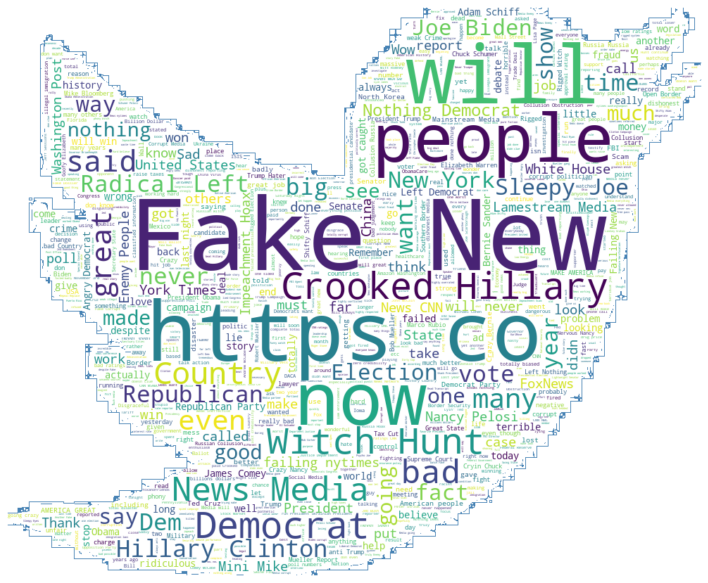

In [29]:
wc = WordCloud(background_color='white', mask=mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='steelblue')
wc.generate(tweet_text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

**Thank you**